In [2]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [3]:
transactions = pd.read_csv('C:/Users/ayrat/Downloads/transactions.csv', sep=';', parse_dates = ['tran_dttm'], comment='#')

In [4]:
transactions

,client_id,tran_dttm,tran_amt,merchant_category,brand,credit_tran_amt,deposit_tran_amt,is_action,is_nfc_pay,term,brand_rk
0,1191,2018-10-09 16:24:27,295.00,Продукты и товары повседневного спроса,Славянский,295.00,0.0,-1.0,0.0,1.0,12453.0
1,1191,2018-10-30 17:42:03,211.00,Продукты и товары повседневного спроса,Славянский,211.00,0.0,-1.0,0.0,1.0,12453.0
2,1191,2018-11-01 10:42:53,210.00,Продукты и товары повседневного спроса,Славянский,210.00,0.0,-1.0,0.0,1.0,12453.0
3,1191,2018-11-14 08:17:04,295.00,Продукты и товары повседневного спроса,Славянский,295.00,0.0,-1.0,0.0,1.0,12453.0
4,1191,2018-11-23 08:23:18,210.00,Продукты и товары повседневного спроса,Славянский,210.00,0.0,-1.0,0.0,1.0,12453.0
...,...,...,...,...,...,...,...,...,...,...,...
705767,74838128,2018-12-23 12:17:26,488.77,Продукты,ПЯТЕРОЧКА,488.77,0.0,-1.0,0.0,1.0,11326.0
705768,74838128,2018-12-27 10:49:28,829.68,Продукты,ПЯТЕРОЧКА,829.68,0.0,-1.0,0.0,1.0,11326.0
705769,74838128,2019-01-25 07:58:57,382.98,Продукты,Пятерочка,382.98,0.0,-1.0,0.0,1.0,11326.0
705770,74838128,2019-02-01 19:16:07,133.96,Продукты,ПЯТЕРОЧКА,133.96,0.0,-1.0,0.0,1.0,11326.0


In [5]:
client = pd.read_excel('C:/Users/ayrat/Downloads/clients.xlsx')

In [6]:
client.head()

,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,16036,15000.0,15000.0,Халва,2018-12-05 00:00:00.000,2019-02-07 00:00:00.000,NaN,45,3,2,2,PNW,0 – 100 тыс,Walk In Sales
1,72530,30000.0,30000.0,Халва + ДК,2018-12-01 00:00:00.000,2018-12-01 00:00:00.000,NaN,65,3,1,4,PNS,300 – 700 тыс,Call Center
2,81134,15000.0,15000.0,Халва,NaN,NaN,NaN,59,3,1,2,PNS,0 – 100 тыс,Walk In Sales
3,82643,15000.0,150000.0,Халва,2018-05-18 00:00:00.000,2019-03-11 00:00:00.000,1.0,37,6,1,1,EME,>700 тыс,Walk In Sales
4,103623,15000.0,30000.0,Халва,2018-10-28 00:00:00.000,2019-02-10 00:00:00.000,NaN,65,2,2,2,PNS,100 – 300 тыс,УРМ


In [7]:
transactions_1 = transactions.merge(client, left_on='client_id', right_on='client_id')

In [18]:
transactions_1

,client_id,tran_dttm,tran_amt,merchant_category,brand,credit_tran_amt,deposit_tran_amt,is_action,is_nfc_pay,term,...,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,1191,2018-10-09 16:24:27,295.00,Продукты и товары повседневного спроса,Славянский,295.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
1,1191,2018-10-30 17:42:03,211.00,Продукты и товары повседневного спроса,Славянский,211.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
2,1191,2018-11-01 10:42:53,210.00,Продукты и товары повседневного спроса,Славянский,210.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
3,1191,2018-11-14 08:17:04,295.00,Продукты и товары повседневного спроса,Славянский,295.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
4,1191,2018-11-23 08:23:18,210.00,Продукты и товары повседневного спроса,Славянский,210.0,0.00,-1.0,0.0,1.0,...,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705767,73001832,2019-01-12 17:01:39,29990.00,Электроника,М.видео,28665.2,1324.80,-1.0,0.0,4.0,...,2018-05-16 00:00:00.000,2019-03-09 00:00:00.000,NaN,27,-1,2,1,OTH,>700 тыс,УРМ
705768,73379403,2018-11-06 13:07:37,2900.00,Одежда и обувь,Cross,2900.0,0.00,-1.0,0.0,4.0,...,NaN,NaN,NaN,49,-1,1,2,EME,300 – 700 тыс,Walk In Sales
705769,73379403,2018-11-07 04:51:37,4790.00,Одежда и обувь,Francesco Donni,4790.0,0.00,-1.0,0.0,4.0,...,NaN,NaN,NaN,49,-1,1,2,EME,300 – 700 тыс,Walk In Sales
705770,73424691,2019-01-22 08:09:09,1190.00,Красота и здоровье,Соната,0.0,1190.00,-1.0,0.0,0.0,...,2018-05-29 00:00:00.000,2019-03-10 00:00:00.000,NaN,39,6,1,1,EME,100 – 300 тыс,Internet Sales


In [9]:
transactions_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705772 entries, 0 to 705771
Data columns (total 24 columns):
client_id                   705772 non-null int64
tran_dttm                   705772 non-null datetime64[ns]
tran_amt                    705772 non-null float64
merchant_category           705406 non-null object
brand                       705767 non-null object
credit_tran_amt             705767 non-null float64
deposit_tran_amt            705767 non-null float64
is_action                   705767 non-null float64
is_nfc_pay                  705767 non-null float64
term                        705767 non-null float64
brand_rk                    705767 non-null float64
credit_limit_initial        705772 non-null float64
credit_limit                705772 non-null float64
add_product                 705772 non-null object
mp_first_login              656834 non-null object
mp_last_login               656834 non-null object
tp_num                      88489 non-null float64
cl_age

In [10]:
transactions_1['merchant_category'].unique()

array(['Продукты и товары повседневного спроса', 'Продукты', 'Прочее',
       'Аптеки', 'Мебель и товары для дома', 'Спорт', 'Одежда и обувь',
       'Красота и здоровье', 'Электроника', 'Авто и запчасти', 'Заправки',
       'Косметика и парфюмерия', 'товары повседневного спроса',
       'Ювелирные изделия', nan, 'Подарки и развлечения', 'Зоотовары',
       'Детские товары', 'Кафе и рестораны', 'Товары для ремонта',
       'Интернет-магазины', 'Досуг и развлечения', 'Путешествия',
       'Такси и грузоперевозки', 'Страхование'], dtype=object)

In [11]:
np.sort(transactions_1['cl_age'].unique())

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

In [13]:
transactions_1['tran_dttm'].max()

Timestamp('2019-03-11 22:54:41')

In [17]:
transactions_1['tran_dttm'].min()

Timestamp('2018-10-01 00:20:51')

In [16]:
transactions_1['tran_dttm'].max() - transactions_1['tran_dttm'].min()

Timedelta('161 days 22:33:50')

In [ ]:
# Ниже пять столбчатых диаграмм, данные сгруппированы по категории товаров и общей сумме трат в зависимости от демографических и географических характеристик клиентов

In [25]:
plt.rcParams.update({'font.size': 20})

In [27]:
Gender_id = pd.DataFrame()

for name, group in transactions_1.groupby(['gender_id']):
    df_1 = group.groupby('merchant_category').sum()
    Gender_id[name] = df_1['tran_amt']
    
Gender_id

,-1,1,2
merchant_category,,,
Авто и запчасти,69046.98,3.754315e+06,6.066056e+06
Аптеки,24448.74,5.795601e+06,2.666877e+06
Детские товары,32310.00,3.896862e+06,1.827816e+06
Заправки,227075.66,2.262514e+07,3.645642e+07
Интернет-магазины,128321.00,1.578861e+07,1.614684e+07
Кафе и рестораны,17042.37,2.420154e+06,2.139498e+06
Косметика и парфюмерия,5265.50,5.349681e+06,1.434396e+06
Красота и здоровье,9633.39,4.368733e+06,1.481460e+06
Мебель и товары для дома,12062.70,8.503461e+06,4.225281e+06


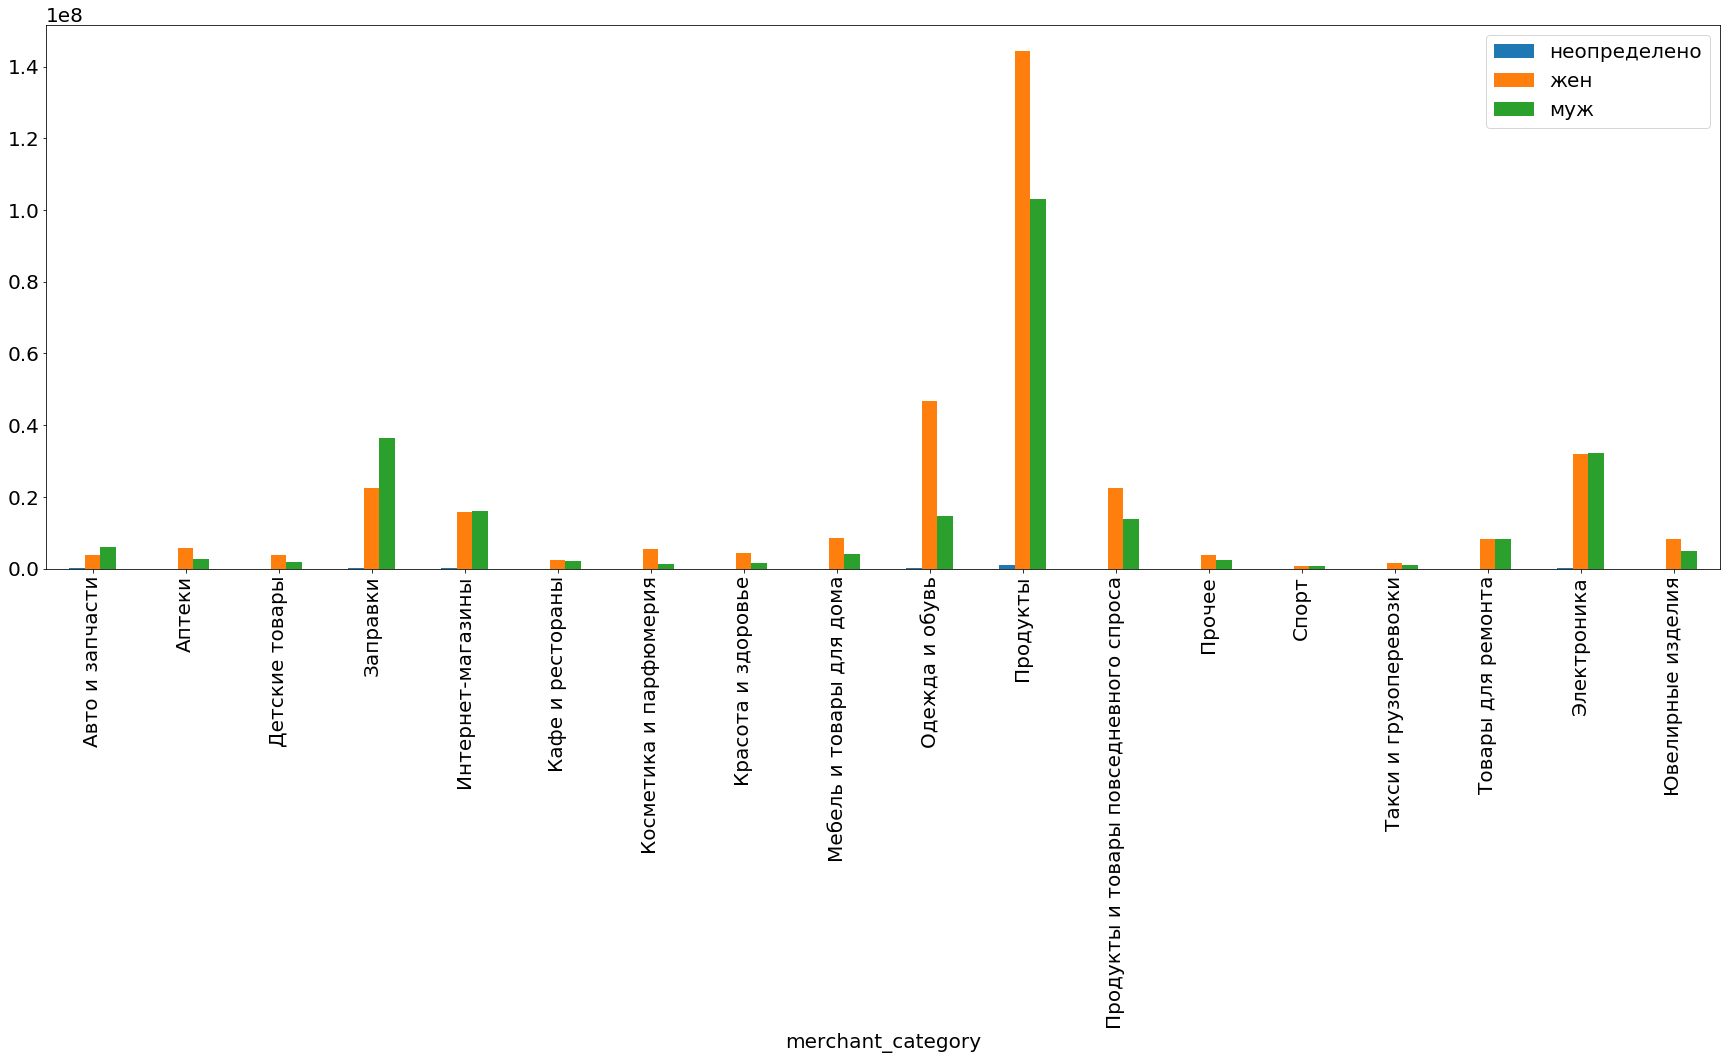

In [28]:
Gender_id.plot.bar(figsize=(30, 10))
plt.legend(['неопределено', 'жен', 'муж'])

In [31]:
Marital_status_id = pd.DataFrame()

for name, group in transactions_1.groupby(['marital_status_id']):
    df_2 = group.groupby('merchant_category').sum()
    Marital_status_id[name] = df_2['tran_amt']

Marital_status_id

,-1,1,2,3,4,5
merchant_category,,,,,,
Авто и запчасти,4.459277e+05,2.329605e+06,6.041384e+06,7.520637e+05,128235.23,192202.88
Аптеки,5.039896e+05,1.642574e+06,4.699191e+06,9.178504e+05,461624.36,261697.31
Детские товары,4.121116e+05,9.047492e+05,3.423770e+06,6.833541e+05,162291.89,170711.63
Досуг и развлечения,2.614700e+04,1.968228e+05,2.051649e+05,5.559802e+04,2540.00,6700.00
Заправки,3.228072e+06,1.271497e+07,3.506984e+07,5.650629e+06,1420986.82,1224139.72
Зоотовары,1.484227e+04,1.442763e+05,1.282652e+05,3.016626e+04,24537.00,30569.60
Интернет-магазины,1.720434e+06,8.945194e+06,1.766066e+07,2.846497e+06,356908.34,534089.50
Кафе и рестораны,3.076706e+05,1.408326e+06,2.298810e+06,4.098640e+05,74778.65,77244.94
Косметика и парфюмерия,3.822840e+05,2.150766e+06,3.243738e+06,6.622468e+05,169901.82,180405.74


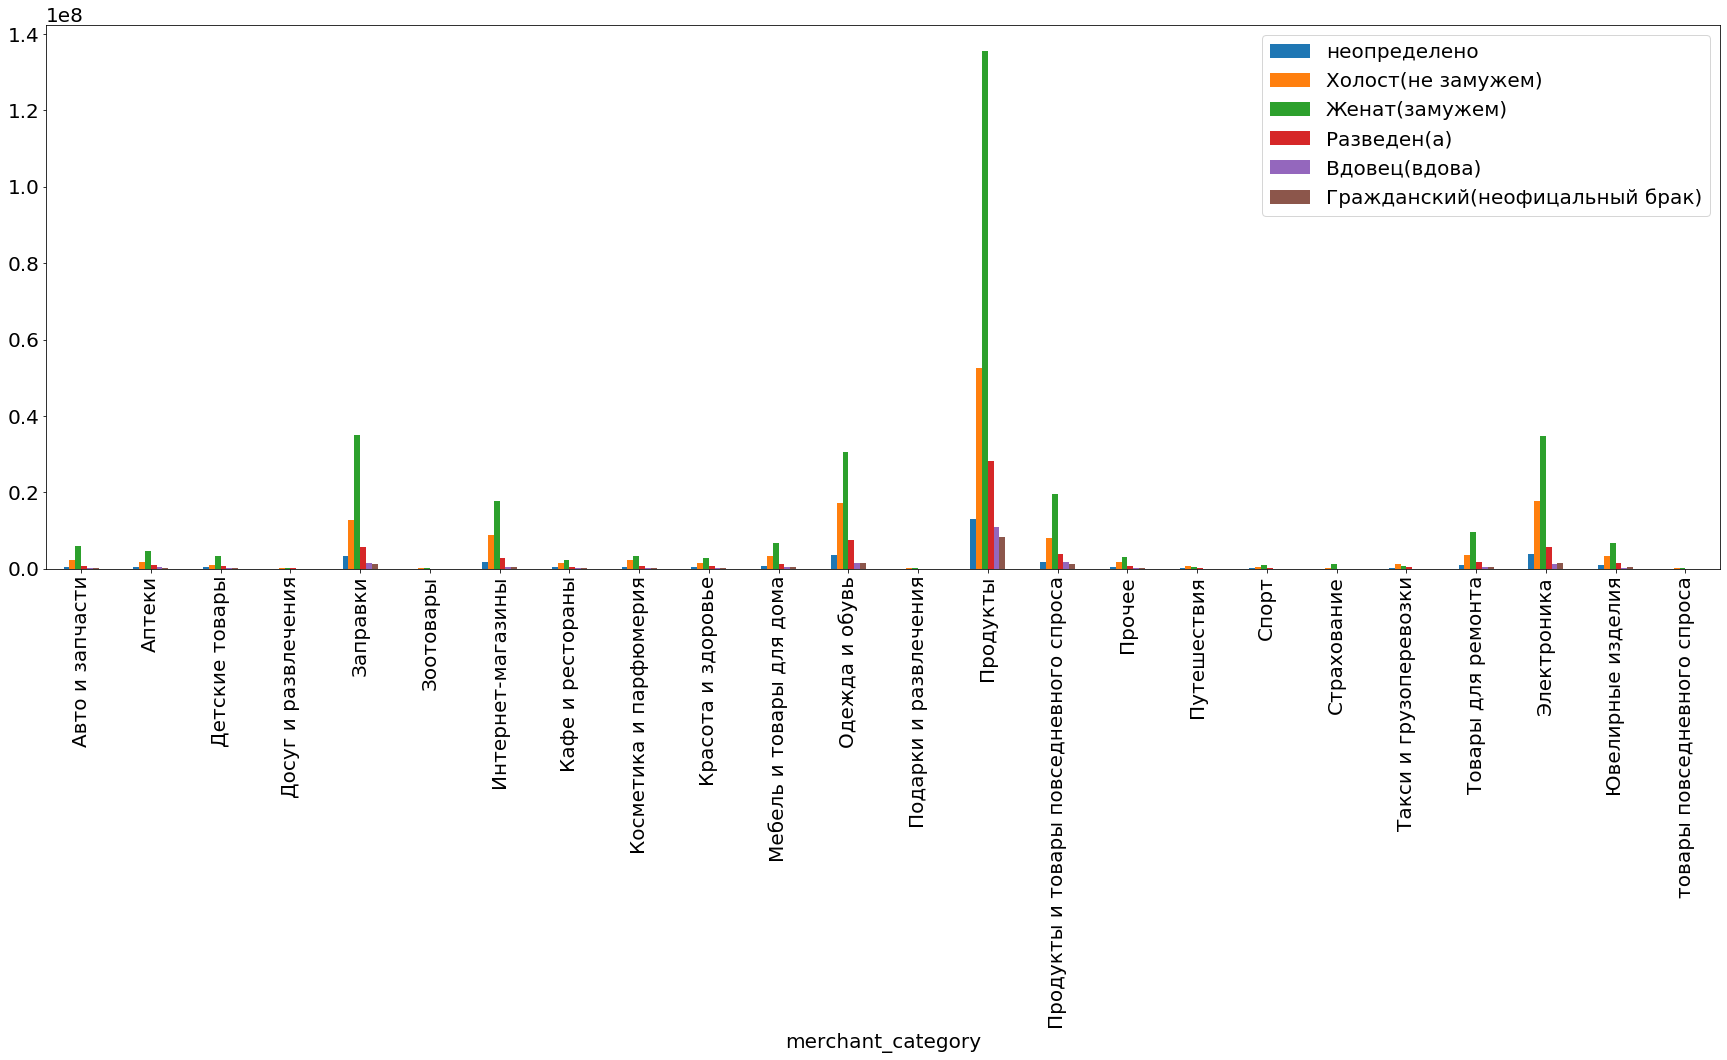

In [32]:
Marital_status_id.plot.bar(figsize=(30, 10))

plt.legend(['неопределено', 'Холост(не замужем)', 'Женат(замужем)', 'Разведен(а)', 'Вдовец(вдова)', 'Гражданский(неофицальный брак)'])

In [34]:
Employment_status_cd = pd.DataFrame()

for name, group in transactions_1.groupby(['employment_status_cd']):
    df_3 = group.groupby('merchant_category').sum()
    Employment_status_cd[name] = df_3['tran_amt']

Employment_status_cd

,BUS,EME,EMR,OTH,PNS,PNW,UNK
merchant_category,,,,,,,
Авто и запчасти,247286.64,6.225920e+06,57369.60,953469.24,7.023350e+05,181870.18,1.521167e+06
Аптеки,221825.22,4.112170e+06,11150.60,666211.96,1.989294e+06,356414.26,1.129860e+06
Детские товары,79065.16,3.527288e+06,28261.80,699062.47,4.812529e+05,103968.30,8.380892e+05
Досуг и развлечения,8950.00,2.880358e+05,170.00,61987.00,1.167200e+04,3674.00,1.184839e+05
Заправки,3992526.61,3.274389e+07,403811.59,5602043.91,6.038418e+06,1684403.42,8.843550e+06
Зоотовары,6584.60,2.448975e+05,NaN,31406.86,3.300911e+04,1360.00,5.539867e+04
Интернет-магазины,1253911.29,1.846223e+07,94801.00,4272846.97,2.004474e+06,536853.84,5.438663e+06
Кафе и рестораны,135677.20,2.780592e+06,19370.40,606291.77,2.277187e+05,63197.32,7.438467e+05
Косметика и парфюмерия,222857.75,3.532905e+06,38349.76,895634.04,6.859731e+05,187606.15,1.226016e+06


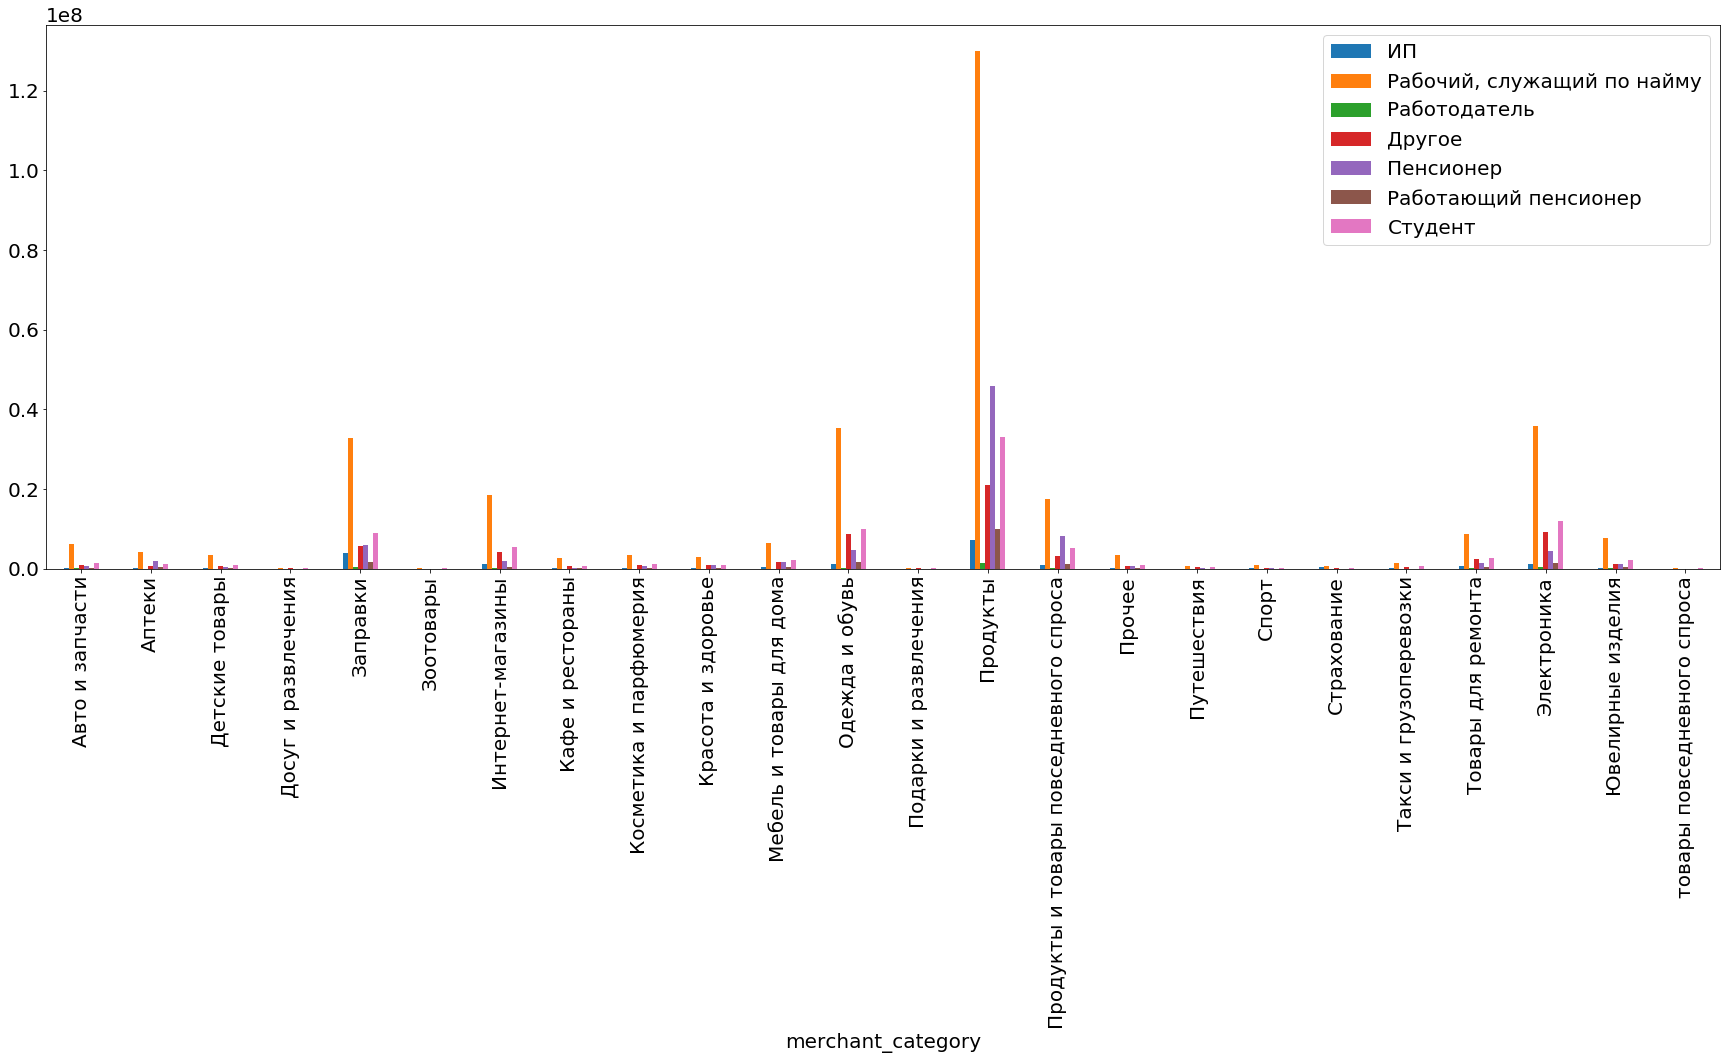

In [35]:
Employment_status_cd.plot.bar(figsize=(30, 10))

plt.legend(['ИП', 'Рабочий, служащий по найму', 'Работодатель', 'Другое', 'Пенсионер', 'Работающий пенсионер', 'Студент', 'Неопределено'])

In [36]:
Education_id = pd.DataFrame()

for name, group in transactions_1.groupby(['education_id']):
    df_4 = group.groupby('merchant_category').sum()
    Education_id[name] = df_4['tran_amt']

Education_id

,-1,2,3,4,6,18
merchant_category,,,,,,
Авто и запчасти,2.606244e+06,651469.65,2.629720e+06,340313.59,3.623177e+06,38493.00
Аптеки,2.063933e+06,639964.33,2.182853e+06,195366.76,3.383503e+06,21307.33
Детские товары,1.604096e+06,320458.80,1.257760e+06,167685.20,2.406039e+06,950.00
Досуг и развлечения,1.855839e+05,23319.00,7.704000e+04,14562.00,1.911678e+05,1300.00
Заправки,1.599159e+07,3680820.44,1.491565e+07,1711994.99,2.291122e+07,97355.28
Зоотовары,9.293153e+04,14356.50,1.191602e+05,27.00,1.461815e+05,NaN
Интернет-магазины,1.016026e+07,1595815.37,6.203883e+06,1229588.23,1.286643e+07,7800.00
Кафе и рестораны,1.357272e+06,227494.79,1.188716e+06,201803.94,1.590121e+06,11287.00
Косметика и парфюмерия,2.255099e+06,395354.60,1.490242e+06,224660.61,2.405097e+06,18888.08


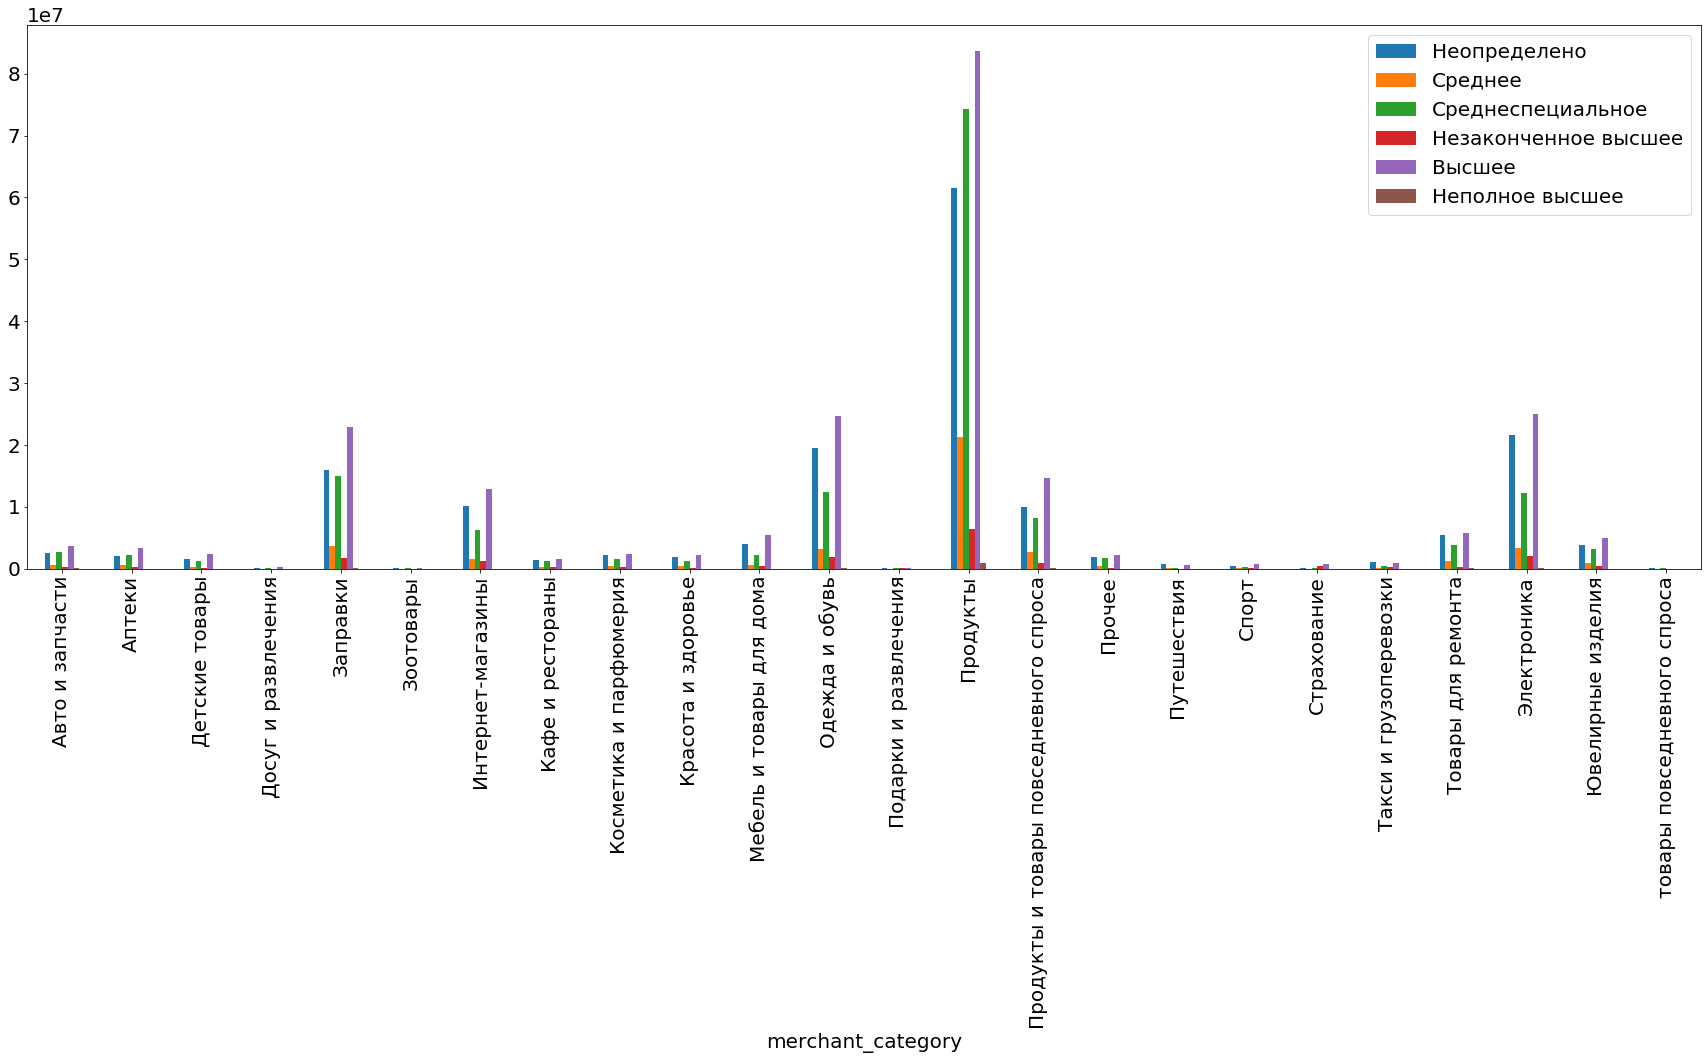

In [37]:
Education_id.plot.bar(figsize=(30, 10))

plt.legend(['Неопределено', 'Среднее', 'Среднеспециальное', 'Незаконченное высшее', 'Высшее', 'Неполное высшее'])

In [38]:
City_population_category = pd.DataFrame()

for name, group in transactions_1.groupby(['city_population_category']):
    df_5 = group.groupby('merchant_category').sum()
    City_population_category[name] = df_5['tran_amt']

City_population_category

,0 – 100 тыс,100 – 300 тыс,300 – 700 тыс,>700 тыс
merchant_category,,,,
Авто и запчасти,2.419198e+06,1.603744e+06,2.722168e+06,3.017984e+06
Аптеки,2.429288e+06,1.623779e+06,1.333717e+06,3.025717e+06
Детские товары,1.691387e+06,1.152413e+06,1.497312e+06,1.219729e+06
Досуг и развлечения,5.496000e+04,4.109027e+04,8.499250e+04,3.087979e+05
Заправки,1.230057e+07,9.805872e+06,1.519719e+07,2.118157e+07
Зоотовары,6.875885e+04,8.207621e+04,4.135908e+04,1.575112e+05
Интернет-магазины,4.925813e+06,6.250714e+06,8.296612e+06,1.158146e+07
Кафе и рестораны,6.792578e+05,9.902575e+05,1.097437e+06,1.641866e+06
Косметика и парфюмерия,1.602271e+06,1.382467e+06,2.058718e+06,1.663320e+06


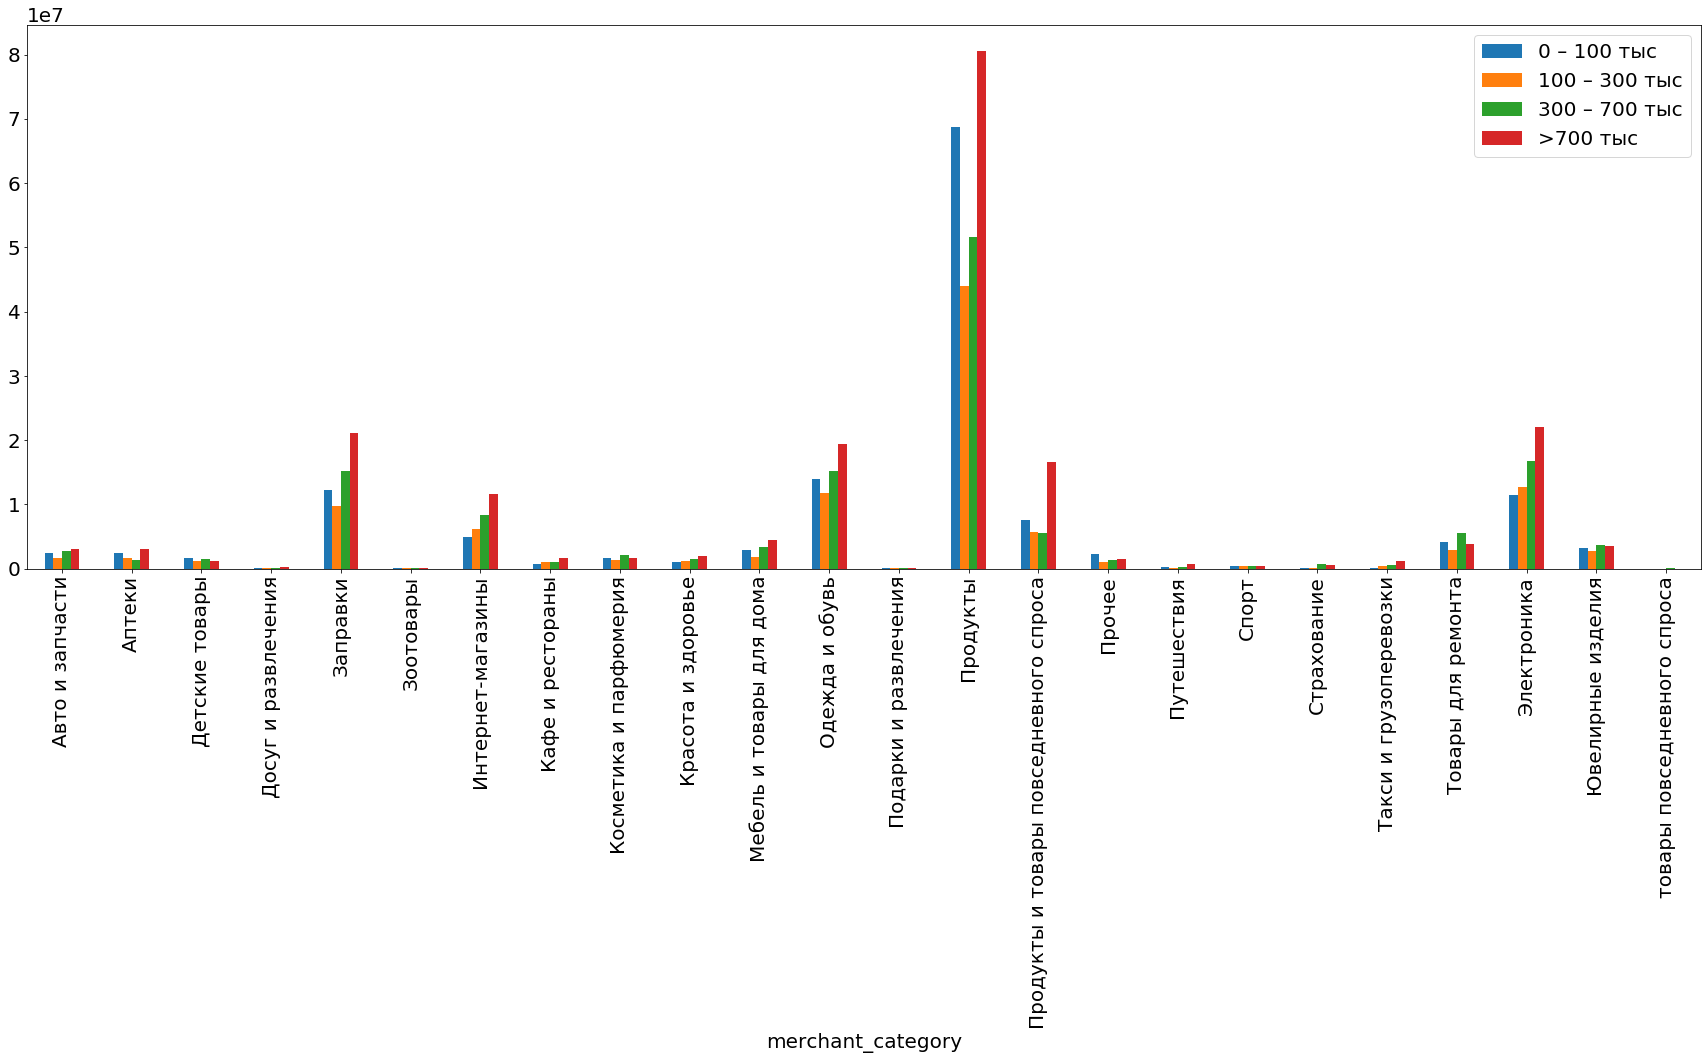

In [39]:
City_population_category.plot.bar(figsize=(30, 10))

In [ ]:
# Сгруппируем данные по "client_id" для нахождения общей суммы транзакций по карте и исследуем их.

In [41]:
Client_id_sum_total = transactions_1.groupby(["client_id"]).sum()

Client_id_sum_total['tran_amt']

client_id
1191         10684.90
1553         17666.28
4669          9285.48
6055          1878.12
9683        141184.23
              ...    
74837646     43910.16
74837901     22889.98
74838039     30215.43
74838061     55925.55
74838128     44912.88
Name: tran_amt, Length: 13268, dtype: float64

In [42]:
def my_basic_research(df=Client_id_sum_total, column = "tran_amt"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count     13268.000000
mean      45327.733078
std       39977.699913
min          20.000000
25%       20513.637500
50%       35369.140000
75%       58659.905000
max      706411.000000
Name: tran_amt, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
3816.0    2
880.0     2
2200.0    2
944.0     2
360.0     2
Name: tran_amt, dtype: int64
------------------------------------
Эксцесс  23.803667590909964
Ассиметрия  3.3056621499250483


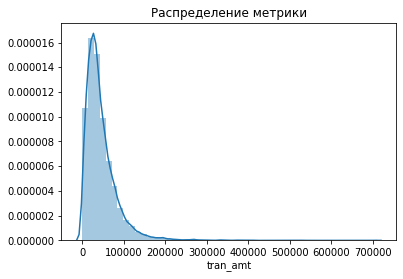

In [43]:
plt.rcParams.update({'font.size': 10})
my_basic_research(column = "tran_amt")

In [44]:
# 95 квантиль для выявления аномалий, которые дополнительно можно исследовать и сделать выводы о том, какой портрет клиента расходующего наибольшее кол-во средств по карте

level_95 = np.percentile(Client_id_sum_total['tran_amt'], 95)

level_95

114412.23199999997

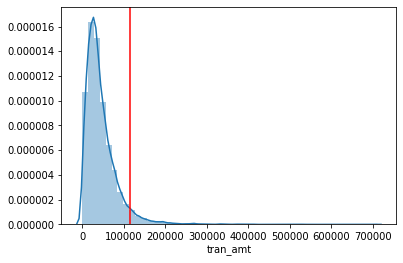

In [45]:
sns.distplot(Client_id_sum_total['tran_amt'])

plt.axvline(x = level_95, color = 'r', linestyle = '-')

In [47]:
Client_id_sum_total_anomaly = Client_id_sum_total[Client_id_sum_total["tran_amt"] >= level_95]

Client_id_sum_total_anomaly = pd.DataFrame(Client_id_sum_total_anomaly["tran_amt"]).merge(client, left_on=Client_id_sum_total_anomaly.index, right_on='client_id')

Client_id_sum_total_anomaly

,tran_amt,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,141184.23,9683,75000.0,75000.0,Халва,2018-05-23 00:00:00.000,2019-03-12 00:00:00.000,NaN,35,-1,2,1,OTH,100 – 300 тыс,DSA
1,120712.15,30682,15000.0,15000.0,Халва + Вклад,2018-04-22 00:00:00.000,2019-03-11 00:00:00.000,NaN,41,-1,2,2,UNK,>700 тыс,Walk In Sales
2,122849.55,378141,15000.0,15000.0,Халва,2018-04-03 00:00:00.000,2019-03-12 00:00:00.000,NaN,41,-1,2,2,UNK,300 – 700 тыс,Call Center
3,129789.32,400260,120000.0,120000.0,Халва + ДКПЗН,2018-05-11 00:00:00.000,2019-03-10 00:00:00.000,1.0,45,-1,1,3,PNW,300 – 700 тыс,Walk In Sales
4,145262.39,533514,30000.0,135000.0,Халва,2018-05-17 00:00:00.000,2019-03-11 00:00:00.000,NaN,35,6,1,3,EME,300 – 700 тыс,Call Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,114592.09,74571608,15000.0,15000.0,Халва + Вклад,2018-06-07 00:00:00.000,2019-03-05 00:00:00.000,NaN,43,-1,1,3,UNK,>700 тыс,Walk In Sales
660,126553.01,74647113,50000.0,105000.0,Халва,2018-05-30 00:00:00.000,2019-03-12 00:00:00.000,NaN,29,-1,2,1,OTH,300 – 700 тыс,DSA
661,121259.75,74648540,15000.0,15000.0,Халва + Вклад,2018-05-30 00:00:00.000,2019-03-11 00:00:00.000,NaN,48,6,2,2,PNS,100 – 300 тыс,Walk In Sales
662,149434.63,74823635,15000.0,15000.0,Халва + Вклад,2018-06-01 00:00:00.000,2019-03-11 00:00:00.000,NaN,37,6,2,2,EME,>700 тыс,Call Center


In [51]:
employment_status_cd_anomaly = Client_id_sum_total_anomaly.groupby(["employment_status_cd"]).count()

employment_status_cd_anomaly['tran_amt']

employment_status_cd
BUS     31
EME    357
EMR      5
OTH    101
PNS     31
PNW     11
UNK    128
Name: tran_amt, dtype: int64

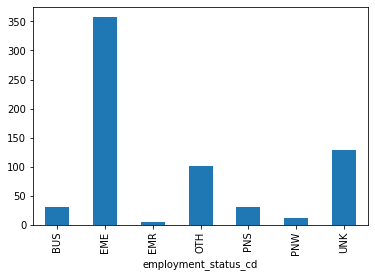

In [52]:
employment_status_cd_anomaly['tran_amt'].plot.bar()

In [54]:
gender_id_anomaly = Client_id_sum_total_anomaly.groupby(["gender_id"]).count()

gender_id_anomaly['tran_amt']

gender_id
-1      4
 1    297
 2    363
Name: tran_amt, dtype: int64

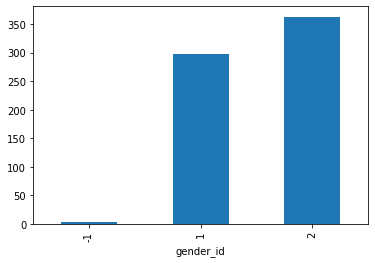

In [55]:
gender_id_anomaly['tran_amt'].plot.bar()

In [56]:
marital_status_id_anomaly = Client_id_sum_total_anomaly.groupby(["marital_status_id"]).count()

marital_status_id_anomaly['tran_amt']

marital_status_id
-1     39
 1    149
 2    393
 3     72
 4      6
 5      5
Name: tran_amt, dtype: int64

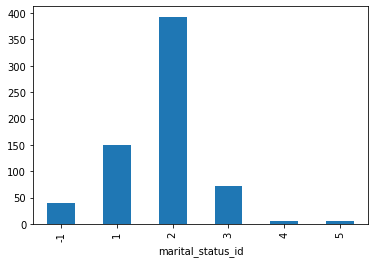

In [58]:
marital_status_id_anomaly['tran_amt'].plot.bar()

In [59]:
education_id_anomaly = Client_id_sum_total_anomaly.groupby(["education_id"]).count()

education_id_anomaly['tran_amt']

education_id
-1    231
 2     25
 3     95
 4     22
 6    291
Name: tran_amt, dtype: int64

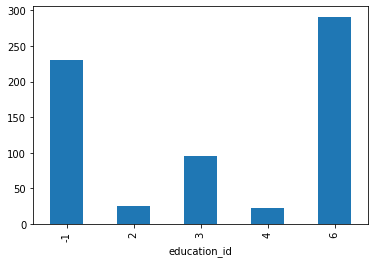

In [60]:
education_id_anomaly['tran_amt'].plot.bar()

In [61]:
Сity_population_category_anomaly = Client_id_sum_total_anomaly.groupby(["city_population_category"]).count()

Сity_population_category_anomaly['tran_amt']

city_population_category
0 – 100 тыс       88
100 – 300 тыс    121
300 – 700 тыс    163
>700 тыс         266
Name: tran_amt, dtype: int64

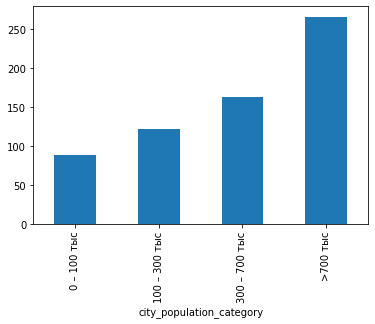

In [62]:
Сity_population_category_anomaly['tran_amt'].plot.bar()

In [ ]:
# Проведем корреляционный анализ, какие характеристики наиболее сильно влияют на общее кол-во трат по карте

In [64]:
Client_id_sum_total_1 = pd.DataFrame(Client_id_sum_total["tran_amt"]).merge(client, left_on=Client_id_sum_total.index, right_on='client_id')

Client_id_sum_total_1

,tran_amt,client_id,credit_limit_initial,credit_limit,add_product,mp_first_login,mp_last_login,tp_num,cl_age,education_id,gender_id,marital_status_id,employment_status_cd,city_population_category,app_channel
0,10684.90,1191,30000.0,30000.0,Халва + ТК,2018-05-30 00:00:00.000,2019-03-03 00:00:00.000,NaN,48,3,2,5,EME,0 – 100 тыс,Call Center
1,17666.28,1553,15000.0,15000.0,Халва,2018-05-15 00:00:00.000,2019-02-15 00:00:00.000,NaN,58,2,1,1,PNW,0 – 100 тыс,Walk In Sales
2,9285.48,4669,15000.0,15000.0,Халва,NaN,NaN,NaN,66,3,2,2,PNS,300 – 700 тыс,Call Center
3,1878.12,6055,15000.0,15000.0,Халва + ДК,NaN,NaN,NaN,66,2,2,5,PNS,0 – 100 тыс,Walk In Sales
4,141184.23,9683,75000.0,75000.0,Халва,2018-05-23 00:00:00.000,2019-03-12 00:00:00.000,NaN,35,-1,2,1,OTH,100 – 300 тыс,DSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,43910.16,74837646,30000.0,30000.0,Халва,2018-06-01 00:00:00.000,2019-03-05 00:00:00.000,NaN,25,-1,1,1,OTH,100 – 300 тыс,Walk In Sales
13264,22889.98,74837901,30000.0,30000.0,Халва,2018-06-01 00:00:00.000,2019-03-11 00:00:00.000,NaN,45,6,1,2,EME,>700 тыс,Internet Sales
13265,30215.43,74838039,75000.0,75000.0,Халва,2018-06-01 00:00:00.000,2019-03-11 00:00:00.000,NaN,34,-1,1,1,OTH,300 – 700 тыс,DSA
13266,55925.55,74838061,75000.0,75000.0,Халва,2018-06-05 00:00:00.000,2019-03-10 00:00:00.000,NaN,57,6,1,3,EME,>700 тыс,Internet Sales


In [63]:
research_list = ["tran_amt", "cl_age", "education_id", "gender_id", "marital_status_id"]

In [65]:
corr_m = Client_id_sum_total_1[research_list].corr()

pd.DataFrame(corr_m['tran_amt'])

,tran_amt
tran_amt,1.000000
cl_age,-0.204132
education_id,-0.036017
gender_id,0.076860
marital_status_id,-0.092448


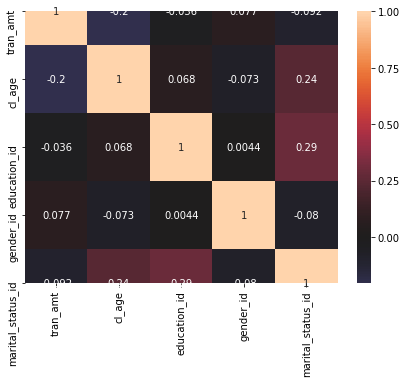

In [70]:
# Создадим тепловую карту

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

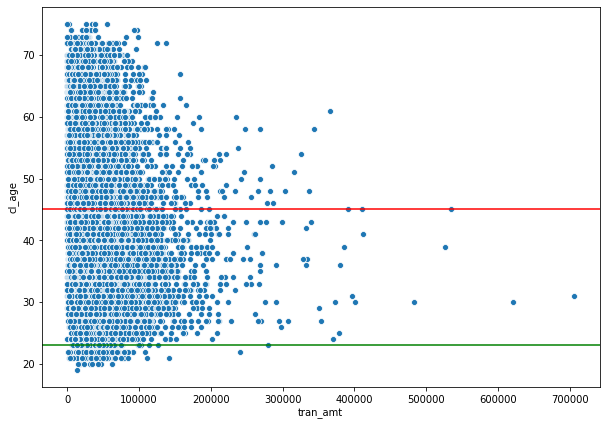

In [71]:
# Наиболее сильное влияние, по сравнению с остальными, оказывает возраст. Диаграмма рассеяния.
sns.scatterplot(x="tran_amt", y="cl_age", data=Client_id_sum_total_1)
plt.axhline(y=23, color="g", linestyle="-")
plt.axhline(y=45, color="r", linestyle="-")

In [ ]:
# Простеньникий алгоритм предсказания расходов за пять месяцев, в зависимости от возраста и семейного положения на основе регрессии

In [72]:
from sklearn.linear_model import LinearRegression

X = Client_id_sum_total_1[["cl_age", "marital_status_id"]]
y = Client_id_sum_total_1['tran_amt']

In [73]:
reg = LinearRegression().fit(X, y)

In [74]:
X_1 = X[13265:13266]

X_1

,cl_age,marital_status_id
13265,34,1


In [75]:
reg.predict(X_1)[0]

52776.74508213854